## Importing the Libraries

In [ ]:
#ALL Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Loading the data

In [ ]:
employee_data= pd.read_csv("/content/employee.csv")

print(employee_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          2000 non-null   int64  
 1   POSITION_TITLE     2000 non-null   object 
 2   DEPARTMENT         2000 non-null   object 
 3   BASE_SALARY        1886 non-null   float64
 4   RACE               1965 non-null   object 
 5   EMPLOYMENT_TYPE    2000 non-null   object 
 6   GENDER             2000 non-null   object 
 7   EMPLOYMENT_STATUS  2000 non-null   object 
 8   HIRE_DATE          2000 non-null   object 
 9   JOB_DATE           1997 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB
None


## Cleaning the data

In [ ]:
# Calculate the median BASE_SALARY for 'POLICE SERGEANT' and 'SENIOR POLICE OFFICER' in 'Houston Police Department-HPD'
median_salary_police_sergeant = employee_data[(employee_data['DEPARTMENT'] == 'Houston Police Department-HPD') &
                                               (employee_data['POSITION_TITLE'] == 'POLICE SERGEANT')]['BASE_SALARY'].median()

median_salary_senior_police_officer = employee_data[(employee_data['DEPARTMENT'] == 'Houston Police Department-HPD') &
                                                     (employee_data['POSITION_TITLE'] == 'SENIOR POLICE OFFICER')]['BASE_SALARY'].median()

# Replace the null values in 'BASE_SALARY' column with the respective medians
employee_data.loc[(employee_data['DEPARTMENT'] == 'Houston Police Department-HPD') &
                  (employee_data['POSITION_TITLE'] == 'POLICE SERGEANT') &
                  (employee_data['BASE_SALARY'].isnull()), 'BASE_SALARY'] = median_salary_police_sergeant

employee_data.loc[(employee_data['DEPARTMENT'] == 'Houston Police Department-HPD') &
                  (employee_data['POSITION_TITLE'] == 'SENIOR POLICE OFFICER') &
                  (employee_data['BASE_SALARY'].isnull()), 'BASE_SALARY'] = median_salary_senior_police_officer



# Handling missing values
employee_data['BASE_SALARY'].fillna(0, inplace=True)  # Filling missing BASE_SALARY with 0
employee_data['RACE'].fillna('Unknown', inplace=True)  # Filling missing RACE with 'Unknown'
employee_data.dropna(subset=['JOB_DATE'], inplace=True)

# Convert HIRE_DATE and JOB_DATE to datetime
employee_data['HIRE_DATE'] = pd.to_datetime(employee_data['HIRE_DATE'])
employee_data['JOB_DATE'] = pd.to_datetime(employee_data['JOB_DATE'])

# Print cleaned data information
print(employee_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   UNIQUE_ID          1997 non-null   int64         
 1   POSITION_TITLE     1997 non-null   object        
 2   DEPARTMENT         1997 non-null   object        
 3   BASE_SALARY        1997 non-null   float64       
 4   RACE               1997 non-null   object        
 5   EMPLOYMENT_TYPE    1997 non-null   object        
 6   GENDER             1997 non-null   object        
 7   EMPLOYMENT_STATUS  1997 non-null   object        
 8   HIRE_DATE          1997 non-null   datetime64[ns]
 9   JOB_DATE           1997 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 171.6+ KB
None


# Question 1: Distribution by Race/Ethnicity

## What is the racial/ethnic composition of the workforce?

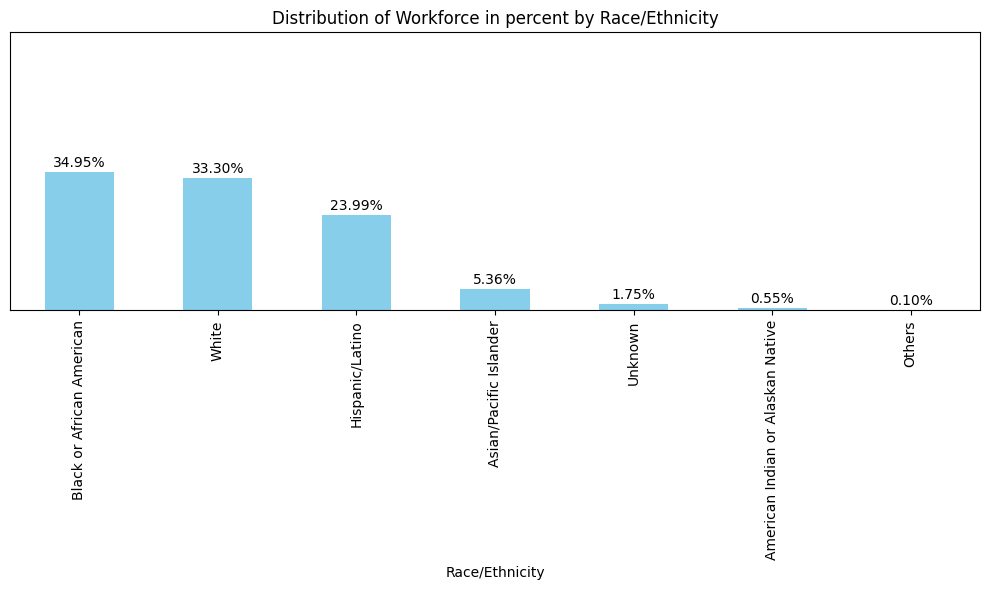

In [ ]:
# Count the number of employees by race/ethnicity
race_counts = employee_data['RACE'].value_counts()

# Calculate proportion for each ethnic group
total_employees = len(employee_data)
race_proportions = race_counts / total_employees * 100  # Converting proportions to percentages

# Plotting the bar chart
plt.figure(figsize=(10, 6))
race_proportions.plot(kind='bar', color='skyblue')
plt.title('Distribution of Workforce in percent by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations on top of each bar
for i, percentage in enumerate(race_proportions):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')  # Format as percentage

# Remove details of the y-axis
plt.yticks([])


plt.ylim(0, 70)
plt.tight_layout()
plt.show()


### Yes, significant disparities exist in the representation of racial/ethnic groups across departments or positions. Black or African American employees comprise 35% of the workforce, indicating higher representation, followed by White employees at 33.25%. However, Hispanic/Latino employees are underrepresented at 24%. Asian/Pacific Islander and American Indian or Alaskan Native employees are represented at 5.35% and 0.55% respectively, indicating minimal presence among the workforce.

## 1.Are there any significant disparities in the representation of different racial/ethnic groups across departments?

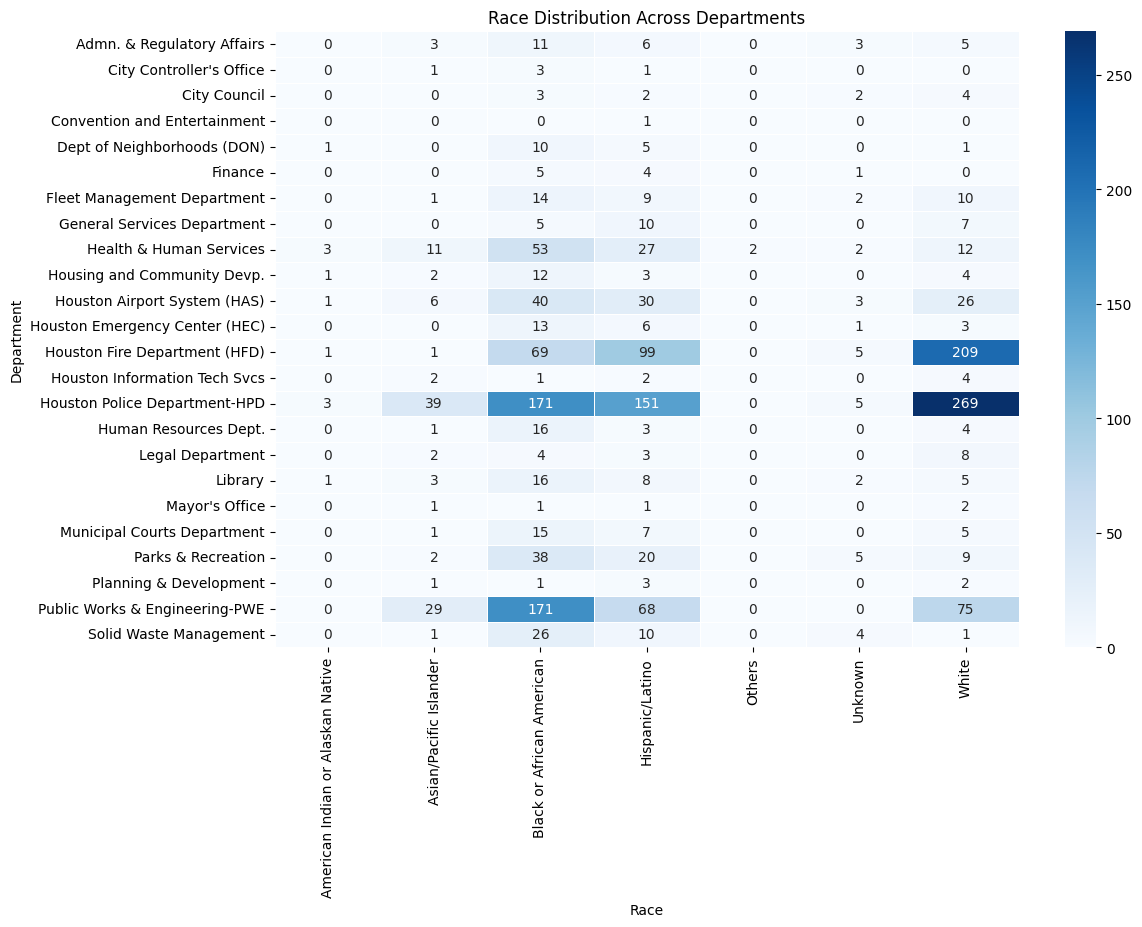

In [ ]:
# Count the number of employees in each department and race
department_race_count = employee_data.groupby(['DEPARTMENT', 'RACE']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(department_race_count, cmap="Blues", annot=True, fmt="d", linewidths=.5)
plt.title('Race Distribution Across Departments')
plt.xlabel('Race')
plt.ylabel('Department')
plt.yticks(rotation=0)
plt.show()


### The Houston Police Department-HPD  is dominated by White,followed by Black and Hispanic/Latino  while American Indian or Alaskan Native and Asian/Pacific Islander were tehe minority. Looking at the heatmap we can see that White,followed by Black and Hispanic/Latino were spread out through all the departments as compared to American Indian or Alaskan Native and Asian/Pacific Islander.

# Question 2 : Gender Representation

## What is the gender distribution within the organization?

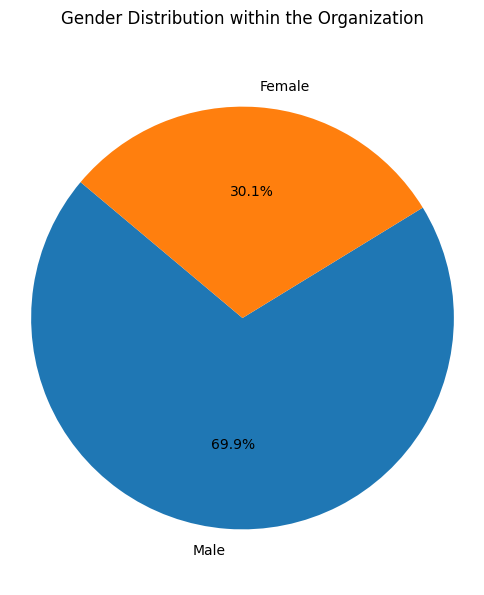

In [ ]:
# Count the occurrences of each gender
gender_distribution = employee_data['GENDER'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))

# Adjusting the space between the title and the pie chart
plt.title('Gender Distribution within the Organization', pad=20)  # Add space between title and pie chart

plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjusting space between title and pie chart
plt.subplots_adjust(top=1.0)

plt.show()




###  Males make up 68.9%, while females constitute 30.1%. This significant gap indicates potential gender imbalance in organization, as the number of males is double that of females.



## 2.Are there any gender imbalances in certain departments?

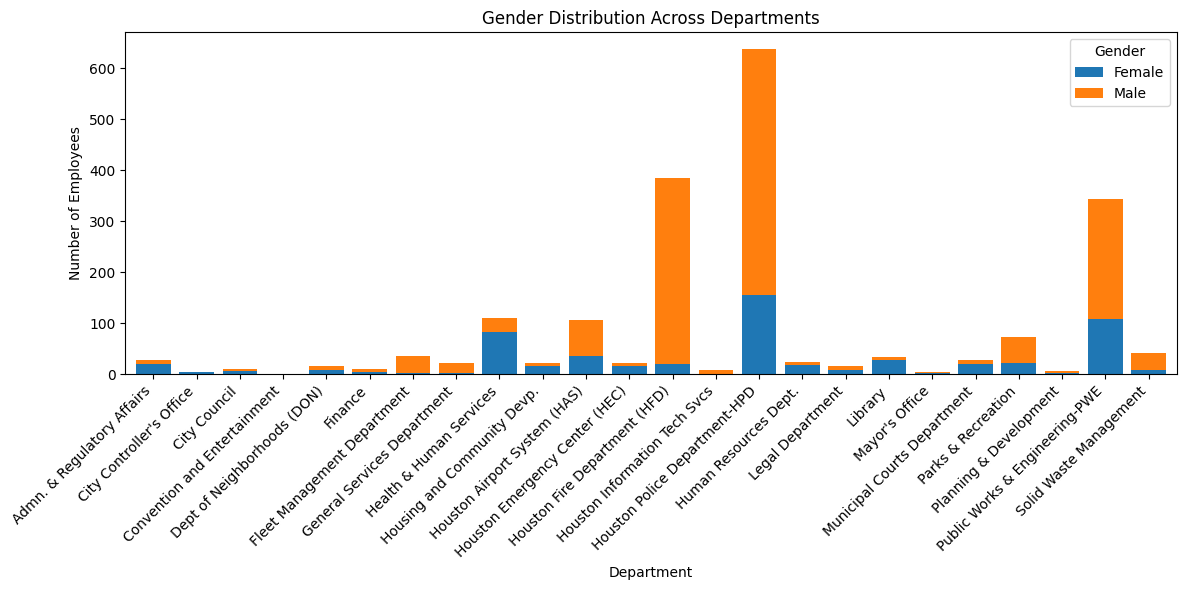

In [ ]:
# Group by department and gender, and count the number of employees
gender_department_counts = employee_data.groupby(["DEPARTMENT", "GENDER"]).size().unstack()

# Plotting
gender_department_counts.plot(kind="bar", stacked=True, figsize=(12, 6),width=0.8)
plt.title("Gender Distribution Across Departments")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


### The bar graph reveals noticeable gender imbalances within various departments. For instance, the Houston Fire Department (HFD), Houston Police Department-HPD, and Public Works & Engineering-PWE exhibit significantly higher male representation compared to females.Generally female are minority in most departments.

## Question 3 :Employment Type Distribution:



### What proportion of employees are full-time, part-time, or contract workers?

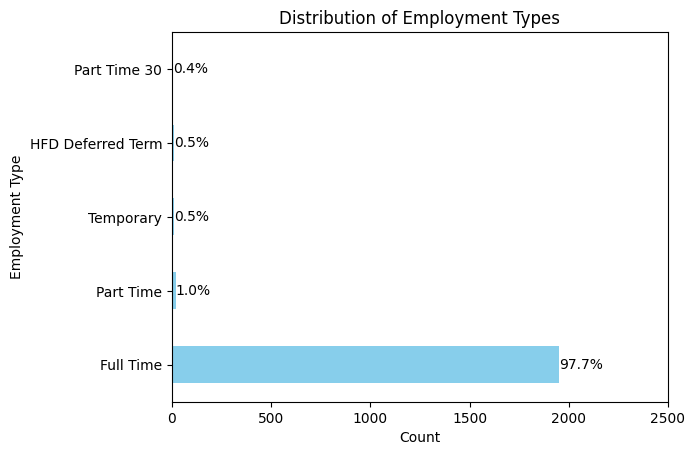

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate value counts of employment types
value_counts = employee_data["EMPLOYMENT_TYPE"].value_counts()

# Calculate percentages
percentages = (value_counts / value_counts.sum()) * 100

# Plot the horizontal bar plot
ax = value_counts.plot(kind='barh', color='skyblue')

# Set x-axis limit to 2500
plt.xlim(0, 2500)

plt.title('Distribution of Employment Types')
plt.xlabel('Count')
plt.ylabel('Employment Type')

# Add percentages to the plot
for i, percentage in enumerate(percentages):
    ax.text(value_counts[i] + 0.1, i, f'{percentage:.1f}%', color='black', va='center')

plt.show()


### The majority of employees are full-time, accounting for over 97%, while the other employment types represent less than 3% collectively.


## 3.Are there differences in employment types across departments?

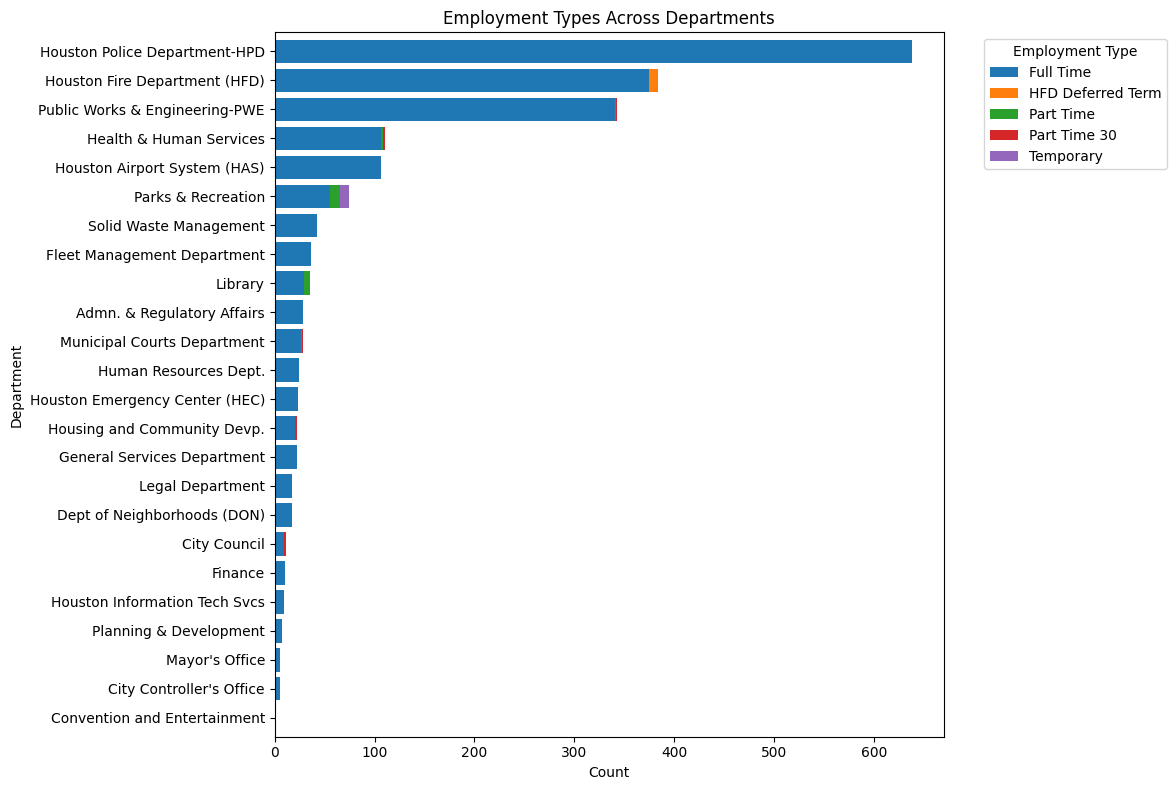

In [ ]:
# Create a DataFrame with the cross-tabulation of DEPARTMENT and EMPLOYMENT_TYPE
cross_tab = pd.crosstab(employee_data['DEPARTMENT'], employee_data['EMPLOYMENT_TYPE'])

# Calculate the total counts for each department
cross_tab['Total'] = cross_tab.sum(axis=1)

# Sort the DataFrame by the total counts in ascending order
cross_tab_sorted = cross_tab.sort_values(by='Total')

# Plotting stacked bar plots
bar_width = 0.8
cross_tab_sorted.drop(columns='Total').plot(kind='barh', stacked=True, figsize=(12, 8), width=bar_width)
plt.title("Employment Types Across Departments")
plt.xlabel("Count")
plt.ylabel("Department")
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### The Houston Police Department (HPD) primarily employs full-time staff. Meanwhile, the Houston Fire Department (HFD) has a portion of its workforce categorized under HFD Deferred Time, and Parks and Recreation employs individuals on part-time and temporary bases.

## 3.Are there differences in employment types across departments?(Repetation of above but in a tabular format)

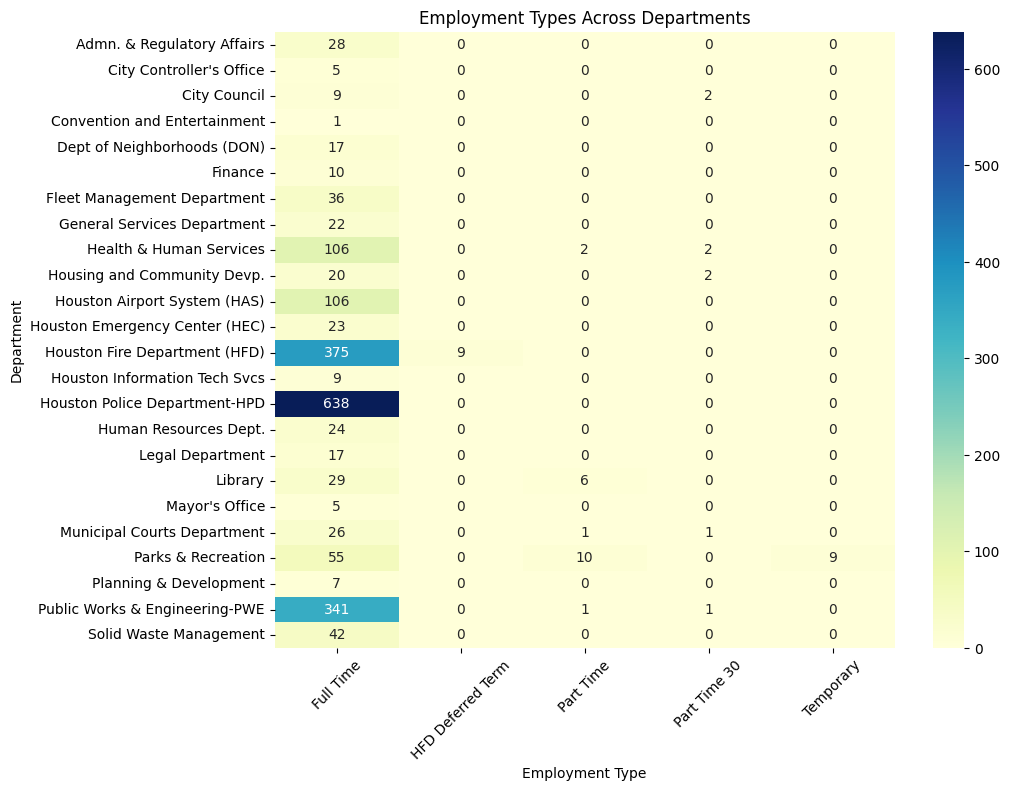

In [ ]:
# Cross-tabulation of DEPARTMENT and EMPLOYMENT_TYPE
cross_tab = pd.crosstab(employee_data['DEPARTMENT'], employee_data['EMPLOYMENT_TYPE'])

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Employment Types Across Departments")
plt.xlabel("Employment Type")
plt.ylabel("Department")
plt.xticks(rotation=45)
plt.show()



###Full-time
Most common type of employment across all departments, with the exception of Houston Fire Department (HFD).
###HFD deferred time:
Only found in the Houston Fire Department (HFD) department, with a total of 9 employees.
### Part-time:
 Found in few departments: Parks & Recreation,Municipal Courts Department,Library,and Health & Human Services

### Temporary:
 Found in a few departments, including Parks & Recreation, Public Works & Engineering-PWE, and Municipal Courts Department.

# Question 5 Tenure Analysis:

## What is the distribution of employee tenure (length of employment) within the organization?

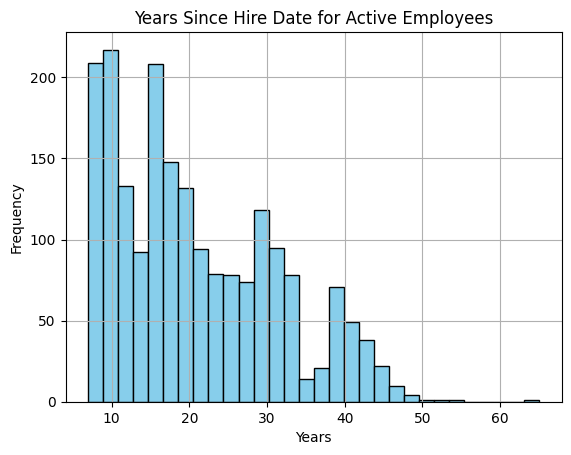

In [ ]:
# Convert 'HIRE_DATE' column to datetime
employee_data['HIRE_DATE'] = pd.to_datetime(employee_data['HIRE_DATE'])

# Calculate the difference between hire date and today's date in years
employee_data['years_since_hire'] = (datetime.today() - employee_data['HIRE_DATE']).dt.days // 365

# Filter data for active employees
active_employee_data = employee_data[employee_data['EMPLOYMENT_STATUS'] == 'Active']

# Plot histogram
plt.hist(active_employee_data['years_since_hire'], bins=30, color='skyblue', edgecolor='black')
plt.title('Years Since Hire Date for Active Employees')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### The majority of employees have been with the organization for approximately 10 to 40 years, while fewer employees have worked with the organization for more than 40 years.

## 5.Are there differences in tenure between different demographic groups (race)?

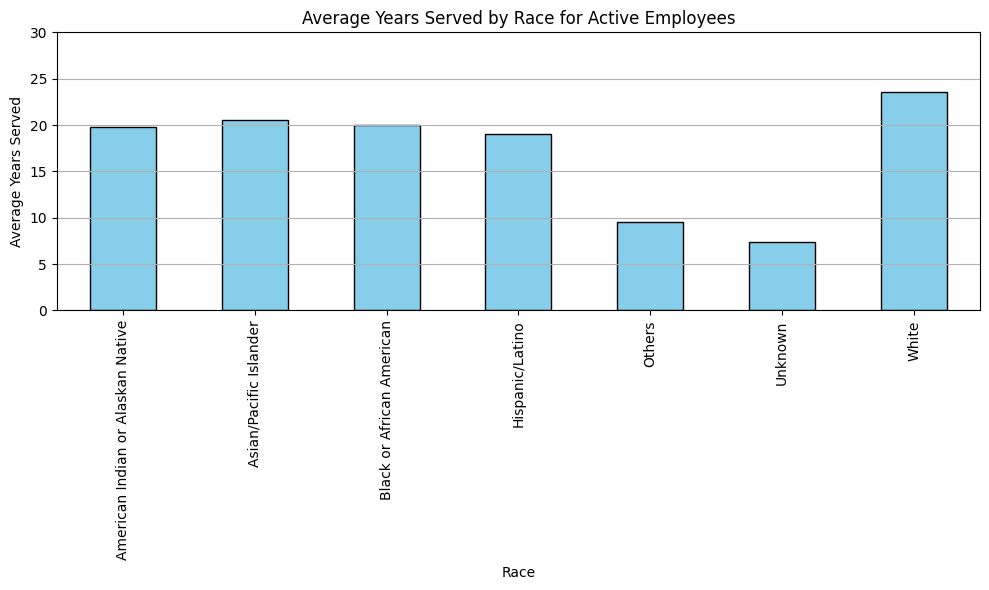

In [ ]:
# Convert 'HIRE_DATE' column to datetime
employee_data['HIRE_DATE'] = pd.to_datetime(employee_data['HIRE_DATE'])

# Calculate the difference between hire date and today's date in years
employee_data['years_since_hire'] = (datetime.today() - employee_data['HIRE_DATE']).dt.days // 365

# Filter data for active employees
active_employee_data = employee_data[employee_data['EMPLOYMENT_STATUS'] == 'Active']

# Group by 'RACE' and calculate mean years served for each race
years_served_by_race = active_employee_data.groupby('RACE')['years_since_hire'].mean()

# Plot bar plot
plt.figure(figsize=(10, 6))
years_served_by_race.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Years Served by Race for Active Employees')
plt.xlabel('Race')
plt.ylabel('Average Years Served')
plt.grid(axis='y')

# Set y-axis limit
plt.ylim(0, 30)

plt.tight_layout()
plt.show()


### On average, White employees have served close to 25 years, while employees of other races have around 20 years of service, or close to it, on average.

## Question 6. Salary Distribution:

## What is the distribution of base salaries across the organization (mean, mode, median)?

In [ ]:
# Calculate mean, mode, and median of base salaries
mean_salary = employee_data['BASE_SALARY'].mean()
median_salary = employee_data['BASE_SALARY'].median()
mode_salary = employee_data['BASE_SALARY'].mode()[0]

print(f"Mean Base Salary: ${mean_salary:.2f}")
print(f"Median Base Salary: ${median_salary:.2f}")
print(f"Mode Base Salary: ${mode_salary:.2f}")

Mean Base Salary: $54690.96
Median Base Salary: $54538.00
Mode Base Salary: $66614.00


### The mean base salary, at 54,690.96, and the median base salary, at 54,538.00, are close. However, the mode base salary, at 66,614.00, is higher.

## 6. Are there any outliers or anomalies in salary levels?

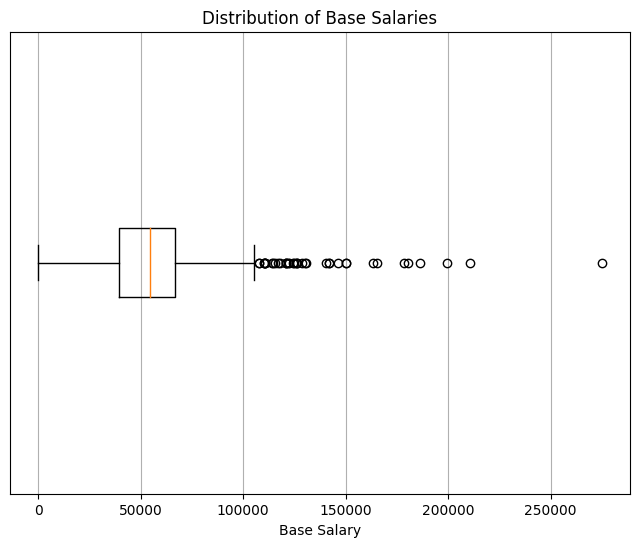

     UNIQUE_ID POSITION_TITLE        DEPARTMENT  BASE_SALARY  \
593        593  CITY ATTORNEY  Legal Department     275000.0   

                          RACE EMPLOYMENT_TYPE GENDER EMPLOYMENT_STATUS  \
593  Black or African American       Full Time   Male            Active   

     HIRE_DATE   JOB_DATE  
593 2016-05-02 2016-05-02  


In [ ]:

# Create a box plot for base salaries
plt.figure(figsize=(8, 6))
plt.boxplot(employee_data['BASE_SALARY'], vert=False)
plt.title('Distribution of Base Salaries')
plt.xlabel('Base Salary')
plt.yticks([])
plt.grid(True)
plt.show()


max_salary = employee_data['BASE_SALARY'].max()
max_salary_row = employee_data[employee_data['BASE_SALARY'] == max_salary]
print(max_salary_row)


### There is salary exceeding 250,000 in the dataset which is an anomaly, specifically for the position of City Attorney within the Legal Department. This individual, identified as Black or African American, holds a full-time position and identifies as male. The salary is 275,000, showcasing a huge difference in compensation within the organization as compared to median salary.

# Question 7. Salary Disparities:

   ## Are there significant differences in salaries between different demographic groups (gender)?

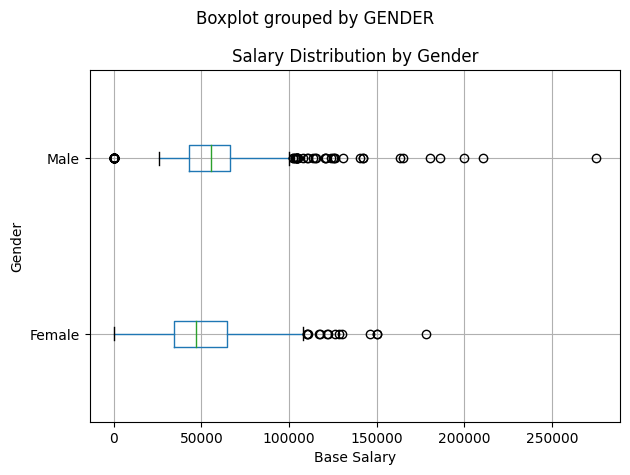

In [ ]:


employee_data.boxplot(column='BASE_SALARY', by='GENDER', vert=False)
plt.title('Salary Distribution by Gender')
plt.xlabel('Base Salary')
plt.ylabel('Gender')

plt.tight_layout()
plt.show()


### Comparing median salaries, male employees surpass the 50,000 mark, while female employees fall below it. This disparity suggests gender-based differences in compensation within the organization.

## 7. Is there evidence of racial pay gaps within the organization?

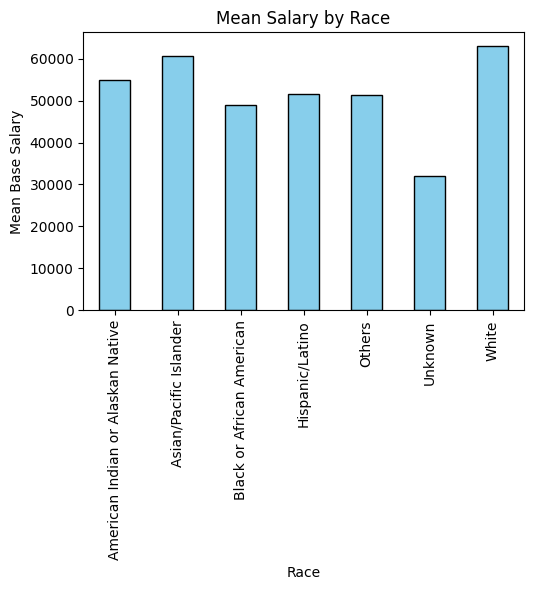

In [ ]:
# Calculate the mean salary for each demographic group
mean_salary_by_race = employee_data.groupby('RACE')['BASE_SALARY'].mean()

# Create bar plots to visualize the mean salaries for different demographic groups
plt.figure(figsize=(10, 6))

# Bar plot for race
plt.subplot(1, 2, 1)
mean_salary_by_race.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Salary by Race')
plt.xlabel('Race')
plt.ylabel('Mean Base Salary')

plt.tight_layout()
plt.show()


### White and Asian/Pacific Islander employees exhibit similar mean base salaries, suggesting comparable compensation levels. However, American Indian/Alaskan Native, Black or African American, and Hispanic/Latino employees fall within a similar salary range, indicating potential disparities.

## Question 8. Salary by Department/Position:

## What is the average salary within each department?

In [ ]:
# Calculate the average salary within each department
average_salary_by_department = employee_data.groupby('DEPARTMENT')['BASE_SALARY'].mean()

print("Average Salary by Department:")
print(average_salary_by_department)



Average Salary by Department:
DEPARTMENT
Admn. & Regulatory Affairs         51484.571429
City Controller's Office           55711.600000
City Council                       48345.727273
Convention and Entertainment       38397.000000
Dept of Neighborhoods (DON)        47092.882353
Finance                            79650.300000
Fleet Management Department        43994.305556
General Services Department        51295.818182
Health & Human Services            49440.263636
Housing and Community Devp.        55807.000000
Houston Airport System (HAS)       53956.066038
Houston Emergency Center (HEC)     46415.739130
Houston Fire Department (HFD)      57358.544271
Houston Information Tech Svcs      76112.777778
Houston Police Department-HPD      60854.423197
Human Resources Dept.              56311.833333
Legal Department                  104959.529412
Library                            36005.057143
Mayor's Office                     86489.600000
Municipal Courts Department        49906.428571

## 8.Are there departments that offer higher salaries compared to others?

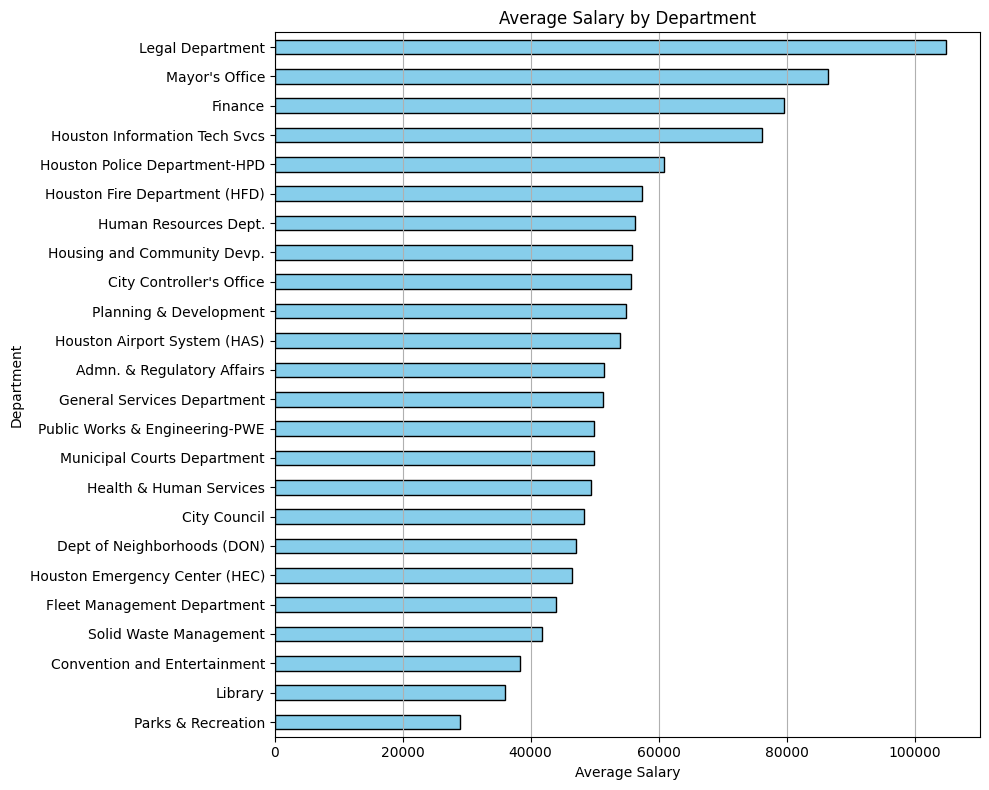

In [ ]:
# Calculate the average salary within each department
average_salary_by_department = employee_data.groupby('DEPARTMENT')['BASE_SALARY'].mean().sort_values()

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
average_salary_by_department.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Average Salary')
plt.ylabel('Department')
plt.title('Average Salary by Department')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


### Indeed, the Legal Department stands out with the highest average salary, exceeding 100,000, while Parks and Recreation registers the lowest, averaging around 30,000—a substantial difference of approximately 70,000 between the two. This highlights significant disparities in compensation across departments